In [35]:
import pandas as pd
import numpy as np
import os
import sys
import gc
from sklearn.manifold import TSNE
from importlib import reload
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import scipy 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import utils
reload(utils)

matplotlib.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-deep')

In [42]:
"""
load data
"""
res_dir = "../results"

df_list = []

for file in os.listdir(res_dir):
    if file.endswith(".csv"):
        fpath = f"{res_dir}/{file}"
        df = pd.read_csv(fpath)
        df_list.append(df)



df = pd.concat(df_list, ignore_index=True)
print(df.shape)
df.head()

(18000, 4)


,Model,Experiment,Cohort,ROCAUC
0,LogisticRegression,BASELINE,HF,0.548798
1,LogisticRegression,BASELINE,HF,0.556903
2,LogisticRegression,BASELINE,HF,0.550295
3,LogisticRegression,BASELINE,HF,0.580476
4,LogisticRegression,BASELINE,HF,0.536534


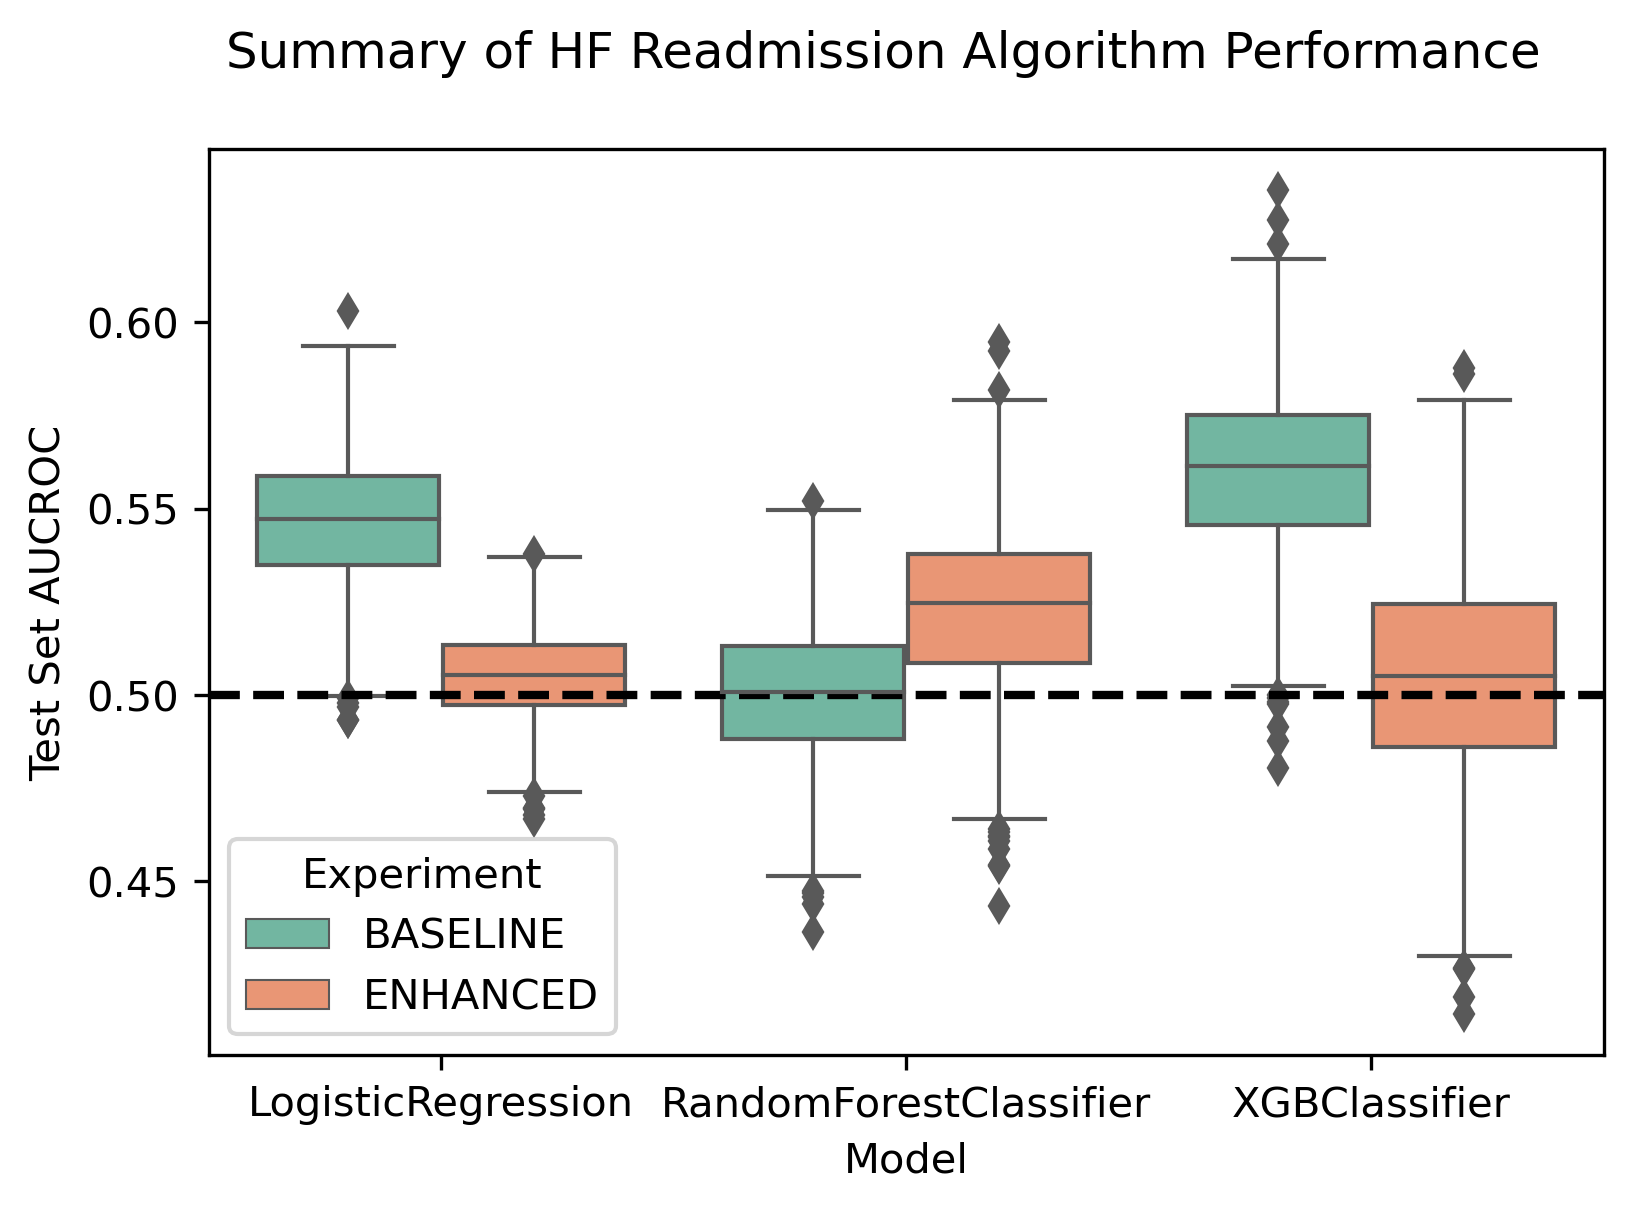

In [52]:
matplotlib.rcParams['lines.color'] = 'black'
matplotlib.rcParams['boxplot.boxprops.color'] = 'black'

COHORT = 'HF'
sub = df[df['Cohort'] == COHORT]

TITLE = f"Summary of {COHORT} Readmission Algorithm Performance"

box = sns.boxplot(y='ROCAUC', 
                    x='Model', 
                    data=sub, 
                    palette='Set2',
                    hue='Experiment',
                    linewidth=1)

plt.axhline(0.5, color='black', ls='--', lw=2)
plt.suptitle(TITLE)
plt.ylabel("Test Set AUCROC")

save_filepath = f"../figures/{TITLE}.png"
plt.savefig(save_filepath,  bbox_inches = 'tight')

<AxesSubplot:xlabel='Model', ylabel='ROCAUC'>

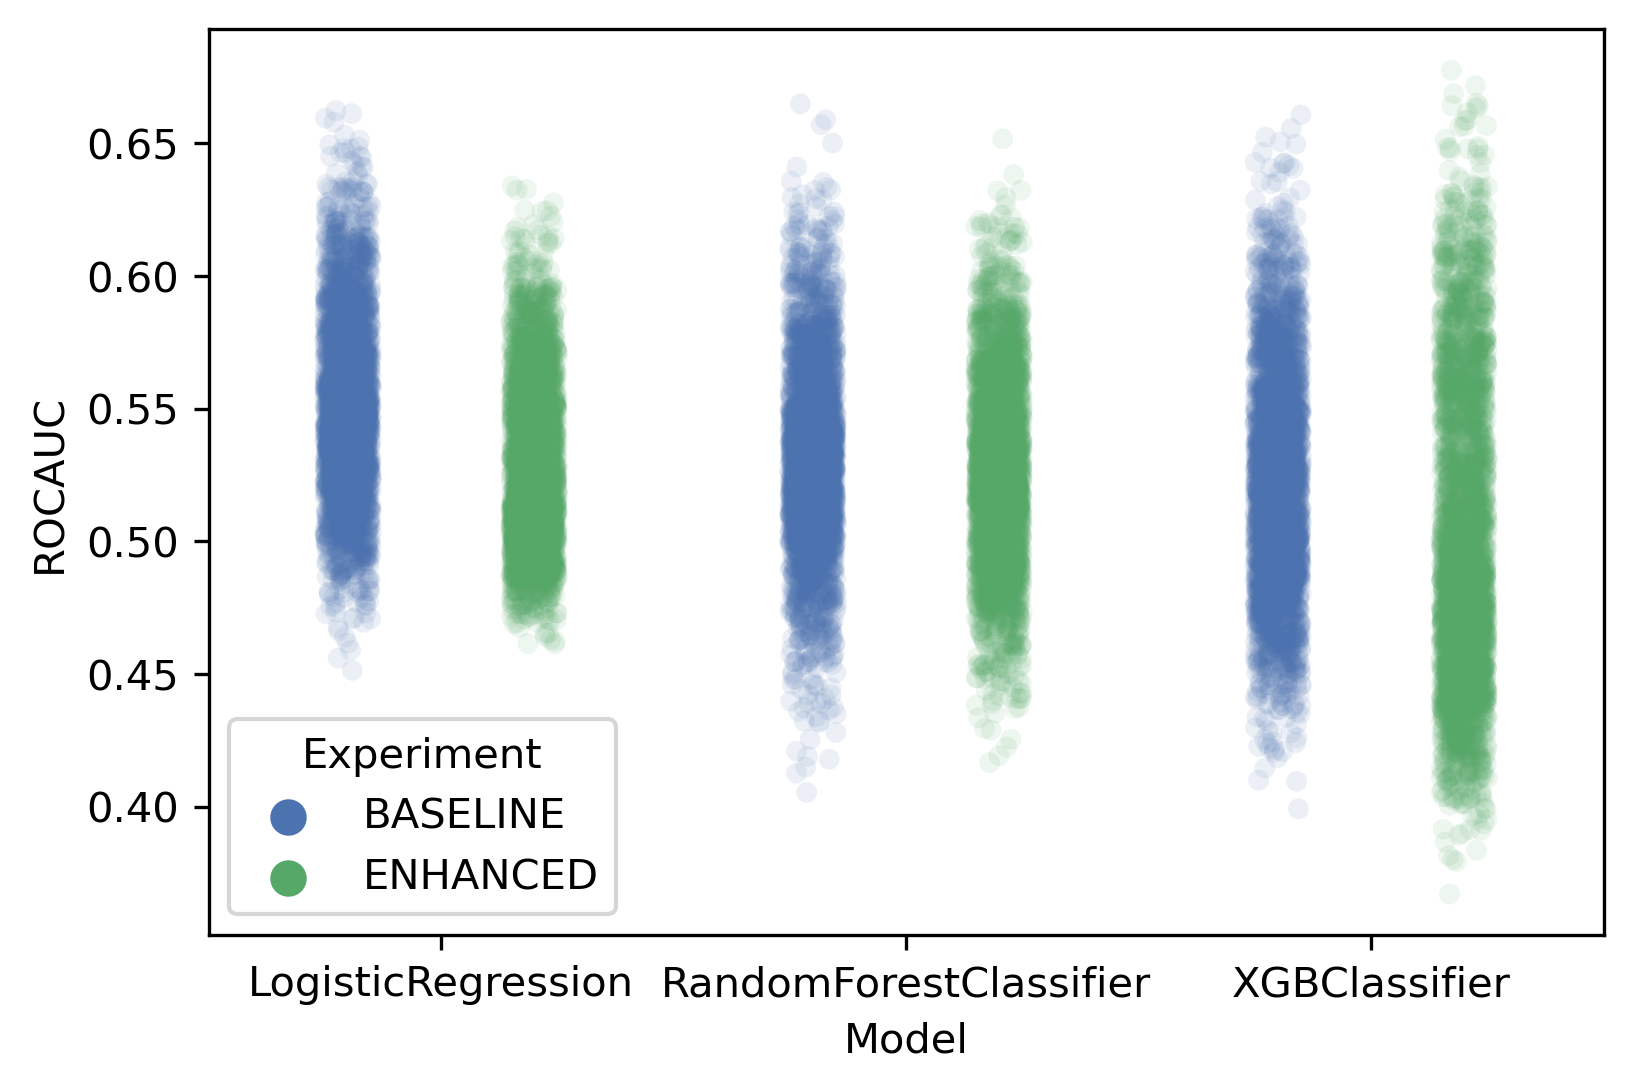

In [40]:
sns.stripplot(y='ROCAUC', 
              x='Model', 
              data=df, 
              jitter=True,
              dodge=True,
              marker='o', 
              alpha=0.1,
              hue='Experiment')